In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# 目标
- 学习用OpenCV绘制不同的几何形状。
- 讲学习以下函数：**cv2.line()**、**cv2.circle()**、**cv2.rectangle**、**cv2.ellipse()**和**cv2.putText()**。

# 1. 代码
上面的函数有一些如下的共同的参数：
- **img**（要绘制形状的图像）
- **color**（形状的颜色，对于**BGR**，需要传递一个元组，例如蓝色**(255, 0, 0)**。对于灰度图像，只需要一个标量值。
- **thickness**（线、圆等形状的线宽，如果设置为**-1**，那就意味着对于闭合的形状进行填充。默认值为**1**。
- **lineType**（线的类型，例如**8-connected**或抗锯齿，默认值是**8-connected**。设置为抗锯齿的**cv2.LINE_AA**对于曲线的显示会更好。

## 1.1 绘制线段
要绘制直线，需要将线段开始和结束的坐标传递给函数，我们首先创建一个黑色的图像，然后绘制一条从左上角到右下角的蓝色线段。

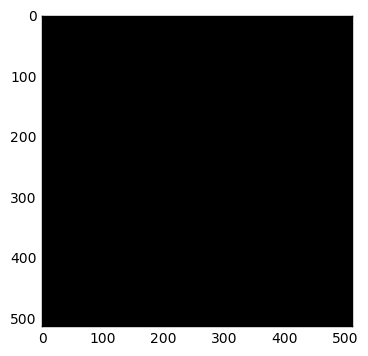

In [7]:
# 创建一个黑色图像
img = np.zeros((512, 512, 3), dtype=np.uint8)
plt.imshow(img[:, :, ::-1])

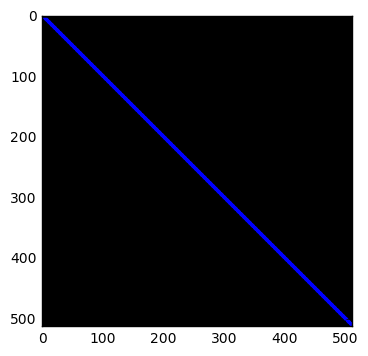

In [8]:
# 绘制直线，线宽为5px
cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 5)

plt.imshow(img[:,:,::-1])

## 1.2 绘制矩形
要绘制矩形，需要给定左上角和右下角的坐标，下面的例子要在右上角绘制一个绿色的矩形。

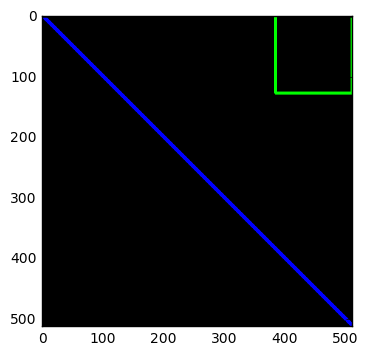

In [9]:
cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)

plt.imshow(img[:, :, ::-1])

## 1.3 绘制圆形
要绘制圆形，需要给定圆心坐标和半径。我们要在矩形上绘制一个圆。

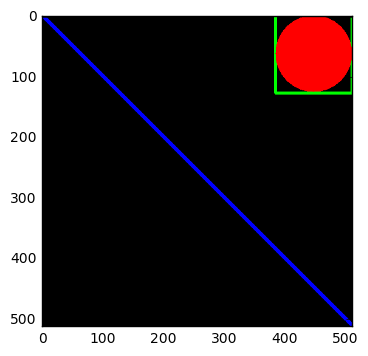

In [10]:
cv2.circle(img, (447, 63), 63, (0, 0, 255), -1)

plt.imshow(img[:, :, ::-1])

## 1.4 绘制椭圆
要绘制椭圆，我们需要传递几个参数：第一个参数是椭圆的中心**(x, y)**，下一个参数是轴的长度（主轴长度和副轴长度），角度参数是椭圆沿逆时针方向旋转的角度。**startAngle**和**endAngle**表示椭圆上从主轴开始逆时针表示的弧，也就是说给定的值为0和360，表示整个椭圆。下面的例子在图像的中心绘制了半个椭圆：

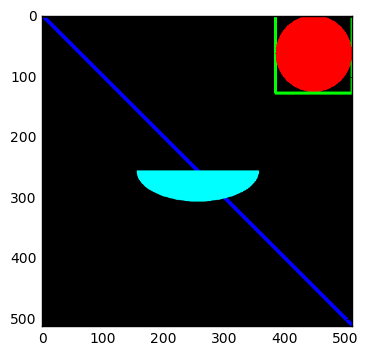

In [16]:
cv2.ellipse(img, (256, 256), (100, 50), 0, 0, 180, (255, 255, 0), -1)

plt.imshow(img[:, :, ::-1])

## 1.5 绘制多边形
要绘制多边形，首先需要顶点的坐标。将这些点放入到一个**ROWS x 1 x 2**的数组中，其中**ROWS**是顶点的数量，数据类型需要是**int32**，下面的代码绘制了一个黄色的小多边形：

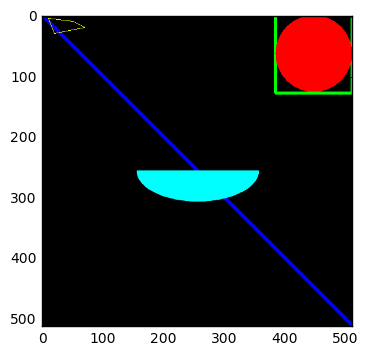

In [17]:
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], dtype=np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255))

plt.imshow(img[:, :, ::-1])

> **注意**  
> 如果第三个参数是**False**，那就会得到一个非闭合的折线，而不是一个闭合的形状。  
> **cv2.polylines()**可以用于绘制多条线，只要把所有的线放到一个列表当中。所有的线将会独立绘制。这比为绘制每条线而调用**cv2.polyline()**函数要更好更快。

## 1.6 向图像中添加文本

要向图像中添加文本，需要指定以下的值：
- 要写入的文本；
- 放置文本的位置，例如以左下角作为开始的位置；
- 字体类型，可以查看**cv2.putText()**的文档获得更多的信息；
- 字体缩放，指定字体的大小；
- 其他的常用参数，例如颜色、线宽、线型等，为了更好的效果，推荐使用**cv2.LINE_AA**作为线型。

下面的代码在图像中写入白色的**OpenCV**：

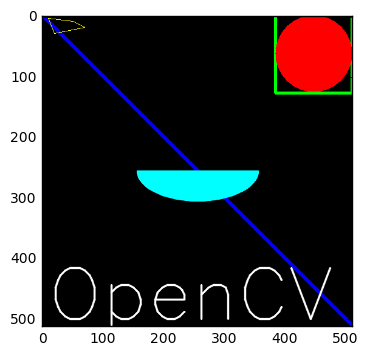

In [18]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 2, cv2.LINE_AA)

plt.imshow(img[:, :, ::-1])